<br><br><center><h1 style="font-size:2em;color:green">Lernkontrolle 05.05.2023</h1></center>
<br>
<center>Die möglichen Punkte stehen bei der jeweiligen Aufgabe dabei</center>

<div class="alert alert-success" role="alert">
Gegeben ist der Datensatz 20230505_3.3_Datensatz_Spotify_Youtube.csv. Alle Aufgaben sind damit zu erledigen.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings as wr
wr.filterwarnings("ignore")

c:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<div class="alert alert-success" role="alert">
1.  Lade den Datensatz als df. Lade jedoch nur die 500 ersten Einträge. 8 Pkt.
</div>

In [2]:
df = pd.read_csv("20230505_3.3_Datensatz_Spotify_Youtube.csv", nrows=500 )
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            500 non-null    object 
 1   Url_spotify       500 non-null    object 
 2   Track             500 non-null    object 
 3   Album             500 non-null    object 
 4   Album_type        500 non-null    object 
 5   Uri               500 non-null    object 
 6   Danceability      500 non-null    float64
 7   Energy            500 non-null    float64
 8   Key               500 non-null    float64
 9   Loudness          500 non-null    float64
 10  Speechiness       500 non-null    float64
 11  Acousticness      500 non-null    float64
 12  Instrumentalness  500 non-null    float64
 13  Liveness          500 non-null    float64
 14  Valence           500 non-null    float64
 15  Tempo             500 non-null    float64
 16  Duration_ms       500 non-null    float64
 1

<div class="alert alert-success" role="alert">
2. Erstelle einen neuen DataFrame "artists", in welchem nach der Spalte "Artist" zusammengefasst, die Mittelwerte der numerischen Daten enthalten sind. 8 Pkt.
</div>

In [3]:
artists = df.groupby('Artist').mean(numeric_only =True)

In [4]:
# alternative
artists = df.set_index('Artist').select_dtypes(include='number').groupby('Artist').mean()
artists.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
Artist,,,,,,,,,,,,,,,
21 Savage,0.7443,0.5863,5.7,-7.3540,0.23416,0.083095,0.000010,0.18883,0.2776,132.1893,221177.1,17182285.0,282495.1,7173.4,218641700.1
2Pac,0.8106,0.7650,4.3,-5.0581,0.19647,0.078859,0.000574,0.22152,0.6487,102.4520,285392.1,109252240.7,849149.3,36782.1,325683181.4
50 Cent,0.7149,0.7083,7.2,-4.2294,0.33380,0.161960,0.000803,0.15867,0.7081,105.6157,224777.5,456024072.7,2751438.0,67265.1,405956641.4
A.R. Rahman,0.6237,0.5701,3.9,-8.8045,0.08534,0.431700,0.000027,0.10739,0.5684,131.6124,294388.2,123613892.7,1097910.9,32442.5,60691393.2
ABBA,0.6285,0.7350,6.2,-7.3050,0.03491,0.363600,0.001528,0.27918,0.7221,120.7860,255842.6,196945255.1,1079742.7,36049.0,334736160.6


In [5]:
artists.shape

(51, 15)

<div class="alert alert-success" role="alert">
3. Erstelle einen Barplot der Daten aus dem DataFrame artists. Der Barplot soll folgendes enthalten:

   1. Auf der x Achse sollen die ersten 5 Künstlernamen stehen. 5 Pkt.

   2. Auf der y Achse soll die Spalte "Danceability" der ersten 5 Künstler aufgetragen sein. 5 Pkt.

   3. Die Farben der Balken sollen entsprechend der Farbpalette "pastel" gewählt werden. 5 Pkt.

   4. Die Balken sollen schwarz umrandet sein. 5 Pkt.
   
   5. x und y Achse sollen mit "Künstler" bzw. "Tanzbarkeit" bezeichnet sein und in Schriftgröße 15 sein. 5 Pkt.
   6. Der Titel soll "Tanzbarkeit nach Künstler" lauten, Schriftgröße 18 haben und in dunkelgrün sein. 5 Pkt.
   7. Die x und y ticks sollen Schriftgröße 10 haben. 5 Pkt.

</div>

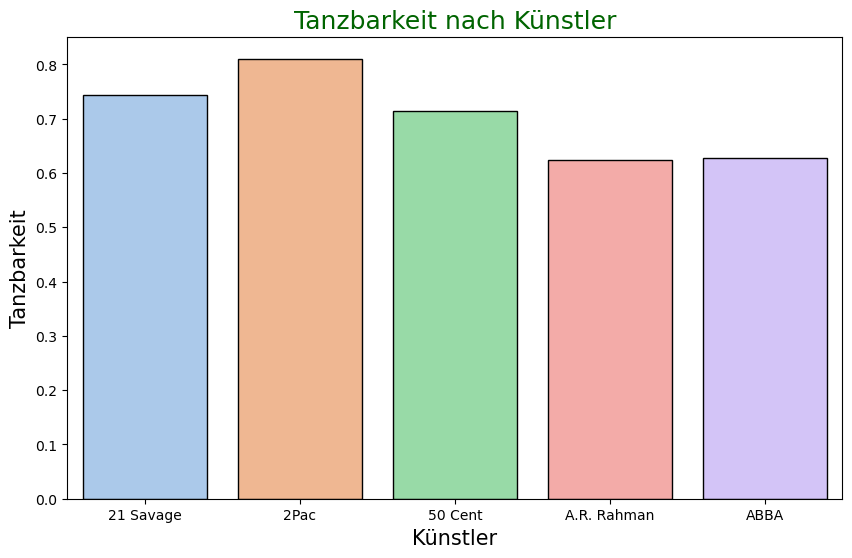

In [8]:

erste_fuenf = artists.head()
palette = sns.color_palette("pastel", len(erste_fuenf.Artist))

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=erste_fuenf.Artist, y=erste_fuenf.Danceability, palette=palette, edgecolor="black")

ax.set_xlabel("Künstler", fontsize=15)
ax.set_ylabel("Tanzbarkeit", fontsize=15)
ax.set_title("Tanzbarkeit nach Künstler", fontsize=18, color="darkgreen")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


<div class="alert alert-success" role="alert">
4. Finde mit Hilfe von Code heraus, welcher Künstler des DataFrames artists im Mittel eine "Energy" von weniger als 0.5 und eine "Loudness" von weniger als -15 hat. 8 Pkt.
</div>

In [9]:
artists = artists.reset_index()

artists[(artists.Energy < 0.5) & (artists.Loudness < -15)].Artist

37    Pink Floyd
Name: Artist, dtype: object

<div class="alert alert-success" role="alert">
5. Erstelle einen Jointplot der Daten aus dem DataFrame artists. Der Barplot soll folgendes enthalten:

   1. Auf der x Achse soll die Spalte "Energy" stehen. 5 Pkt.
   2. Auf der y Achse soll die Spalte "Loudness" stehen. 5 Pkt.
   3. Durch die Punktewolke soll eine Regressionsgerade laufen. 5 Pkt.
   4. Der Schriftzug "Ausreißer" soll mit einem Pfeil auf den Punkt zeigen, der die niedrigste Loudness hat (Dieser sollte in Aufgabe 3 herausgefunden werden). 8 Pkt.
   5. Der Pfeil soll in schwarz dargestellt sein. 5 Pkt.

</div>

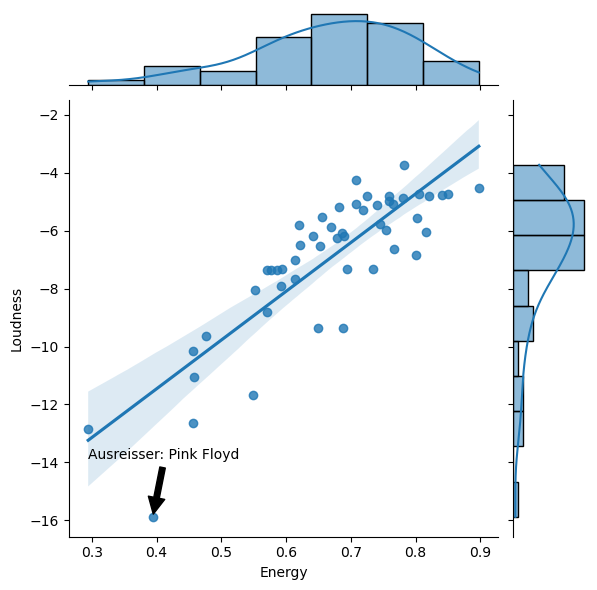

In [10]:

sns.jointplot(x='Energy', y='Loudness', data=artists, kind='reg')


outlier = artists[artists['Loudness'] == artists['Loudness'].min()]
plt.annotate(f'Ausreisser: {artists[(artists.Energy < 0.5) & (artists.Loudness < -15)].Artist.values[0]}', 
             xy=(outlier['Energy'], outlier['Loudness']),
             xytext=(outlier['Energy']-0.1, outlier['Loudness']+2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

